INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 5, 'problem': 'Rastrigin', 'problem_size': 100, 'communication_type': 'temp2', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15, 'delete agents': True}
INFO:root:Socjo started
Progress: 360005it [03:14, 1847.72it/s]                            
INFO:root:Socjo finished in 3.883697207768758
Progress: 360005it [00:35, 10241.84it/s]                            
INFO:root:comparison finished in 3.4378639380137126
INFO:root:best socjo 77.96798687414282 best single 93.89500891080112


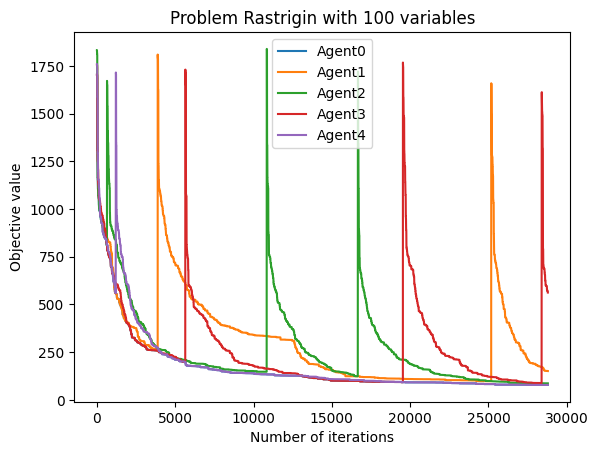

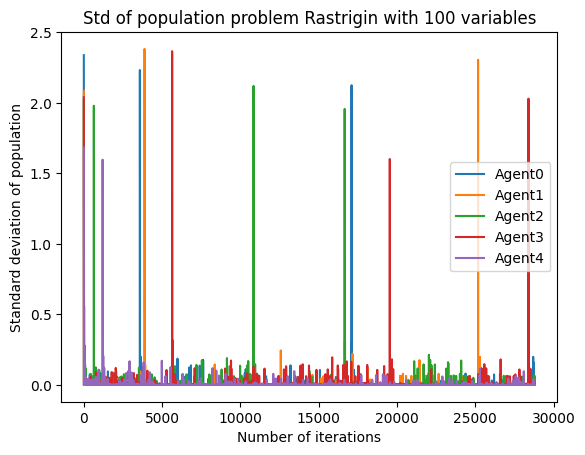

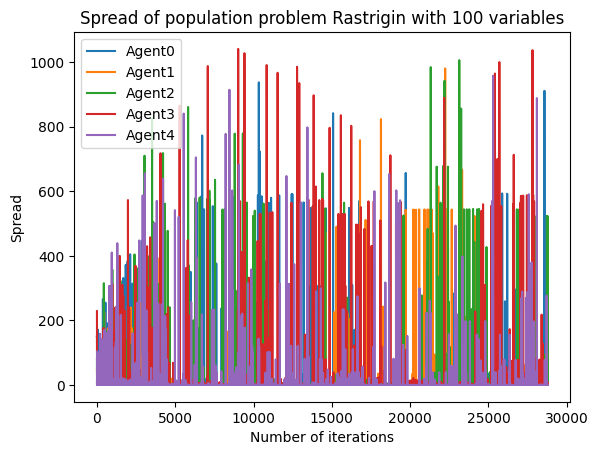

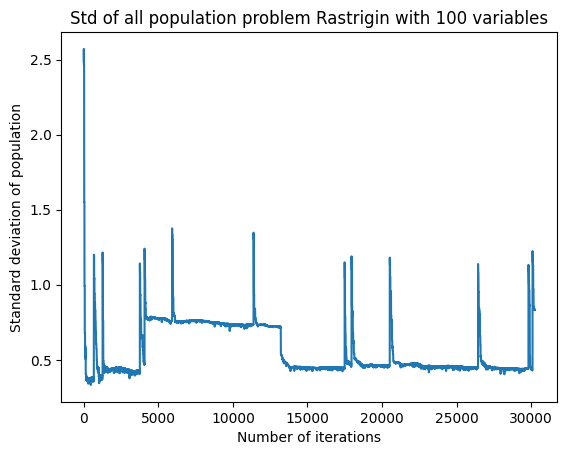

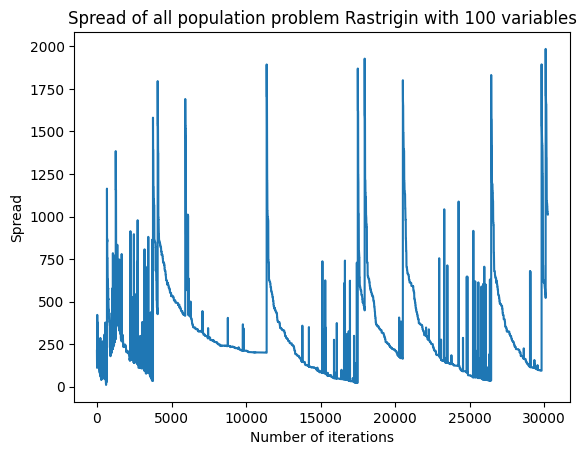

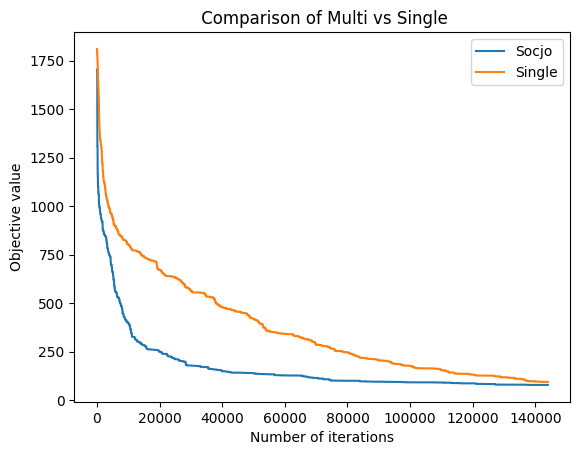

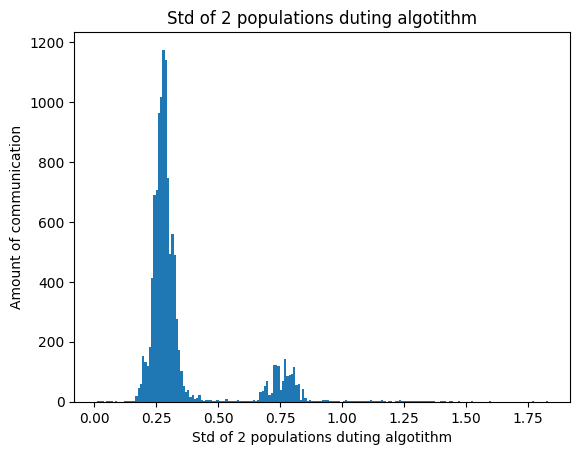

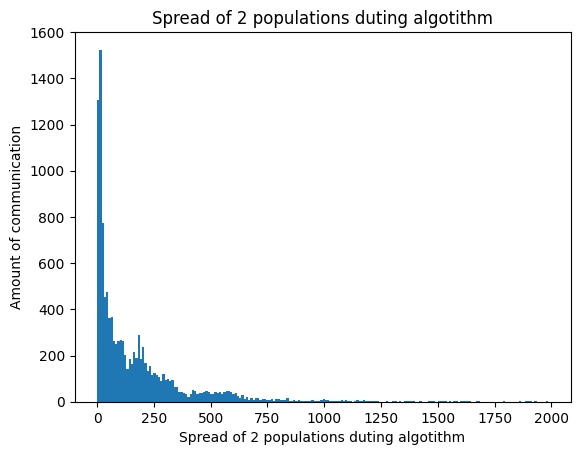

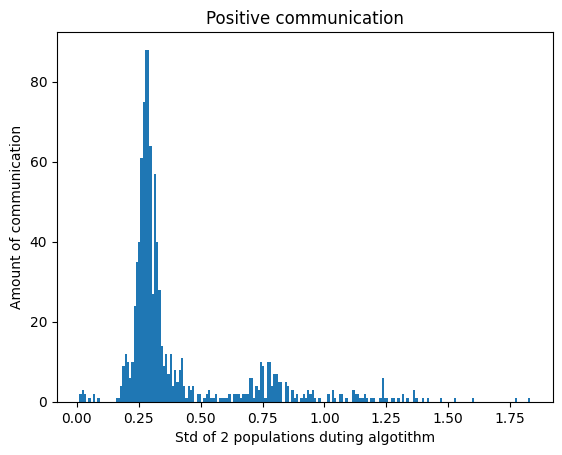

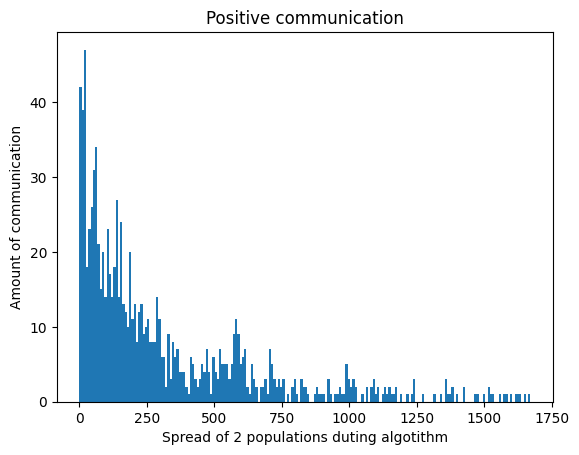

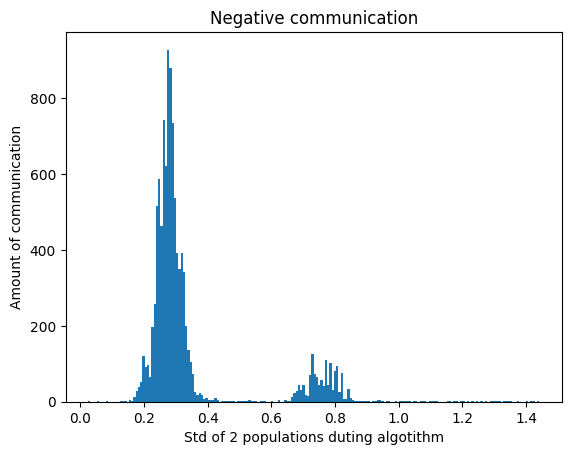

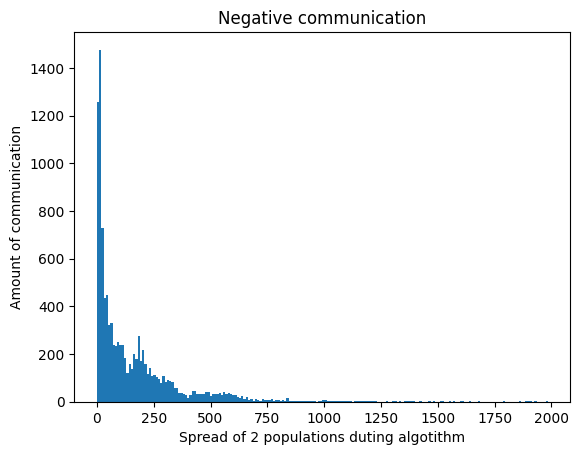

INFO:root:plotting finished in 0.07772504885991414
INFO:root:Run 0 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 3.6760434985160826


In [1]:
import logging

from inicialization.agents_inicialization import create_agents_float_solution
from settings import Settings
from runners.single import MultiAgentRunner
from runners.statistic import StatisticRunner
from time import time

time1 =  time()
Statistic_runner_list = []
for idx, config in enumerate(["config_R.json"]):
    with open(config,"r") as f:
        settings = Settings(f)
        # logging.basicConfig(level=settings.log_level)
    logging.basicConfig(level=logging.INFO)
    logging.info(settings.json_settings)
    config = settings.decodeAgentsData()
    iterations = config.problem.number_of_variables *450 * (8-(idx*2)) 
    Agents, Agent_Reference = create_agents_float_solution(config)     
    runner = MultiAgentRunner(agents= Agents, agent_single= Agent_Reference, max_iterations=iterations)
    Statistic_runner_list.append(StatisticRunner(runner))
    Statistic_runner_list[idx].run_an_collect_data(no_runs = 3, cycles=int(iterations/50/config.noAgents) , cycle_iter=50, num_of_comm=2)
    if settings.enable_plots:
        Statistic_runner_list[idx].plot()

In [ ]:
for el in Statistic_runner_list:   
    for i in range (0, len(el.Executor.comunication_history)//1000):

        lista1 = list(filter(lambda hist: hist.result == True, el.Executor.comunication_history[i*1000:(i+1)*1000]))
        lista2 = list(filter(lambda hist: hist.result == False, el.Executor.comunication_history[i*1000:(i+1)*1000]))
        print(f"{i*1000} - {(i+1)*1000} nr komunikacji pozytywna {lista1.__len__()} negatyna {lista2.__len__()}")


0 - 1000 nr komunikacji pozytywna 125 negatyna 875
1000 - 2000 nr komunikacji pozytywna 106 negatyna 894
2000 - 3000 nr komunikacji pozytywna 94 negatyna 906
3000 - 4000 nr komunikacji pozytywna 81 negatyna 919
4000 - 5000 nr komunikacji pozytywna 111 negatyna 889
5000 - 6000 nr komunikacji pozytywna 82 negatyna 918
6000 - 7000 nr komunikacji pozytywna 87 negatyna 913
7000 - 8000 nr komunikacji pozytywna 63 negatyna 937
8000 - 9000 nr komunikacji pozytywna 79 negatyna 921
9000 - 10000 nr komunikacji pozytywna 80 negatyna 920
10000 - 11000 nr komunikacji pozytywna 68 negatyna 932
11000 - 12000 nr komunikacji pozytywna 81 negatyna 919
12000 - 13000 nr komunikacji pozytywna 61 negatyna 939
13000 - 14000 nr komunikacji pozytywna 71 negatyna 929
14000 - 15000 nr komunikacji pozytywna 58 negatyna 942
15000 - 16000 nr komunikacji pozytywna 45 negatyna 955
16000 - 17000 nr komunikacji pozytywna 55 negatyna 945
17000 - 18000 nr komunikacji pozytywna 70 negatyna 930
18000 - 19000 nr komunikacji 